<a href="https://colab.research.google.com/github/karthiviz/Directions_China_SKorea_Japan/blob/main/a_landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import json
ox.config(log_console=True, use_cache=True)

In [2]:
G = ox.load_graphml('/content/drive/MyDrive/osmfiles/china_highways_all.graphml')

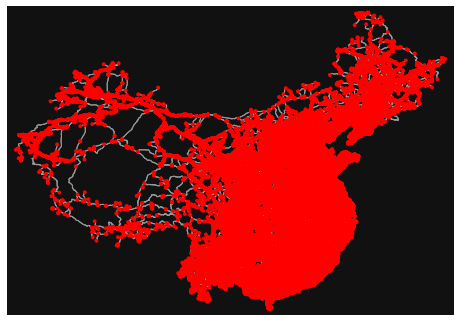

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
ox.plot_graph(G, node_color='r')

In [ ]:
sources = [(21.542682, 108.135187),(21.492726, 109.515366),(20.297019, 110.030256),(21.437482, 110.978113),(21.903377, 112.974621),\
           (22.087790, 113.543575),(22.749528, 113.615459),(22.297183, 114.306761),(22.950866, 116.495498),(23.524340, 116.887220),(23.616068, 117.026289),\
           (23.652767, 117.061564),(23.590743, 117.090403),(23.573780, 117.324324),(23.586747, 117.443420),(23.735486, 117.532474),(23.806864, 117.631053),\
           (23.973784, 117.780979),(24.330024, 118.108436),(25.817210, 119.605411),(27.519862, 120.647584),(29.878478, 122.097877),(28.589950, 121.575216),\
           (30.015268, 122.330473),(31.367946, 121.564804),(33.668253, 120.562993),(36.104655, 120.514783),(37.518027, 121.191112),(37.517559, 118.774661),\
           (40.234887, 120.386935),(40.191960, 124.309485),(42.694102, 126.154615),(48.217531, 126.510301),(49.581368, 118.218552),(42.279282, 109.907196),
           (43.757405, 87.765138),(41.398845, 80.464621),(39.604044, 75.986184),(37.067832, 80.268622),(29.641139, 90.937855),(28.277050, 99.273743),(26.584322, 99.926600),\
           (23.643594, 101.908598)]
      
landmarks = [ox.get_nearest_node(G, source) for source in sources]

In [6]:
landmarks

[6484367291,
 5976319359,
 3948391012,
 5044175687,
 8020821414,
 3265329693,
 3753125339,
 1695401581,
 2479885105,
 2819866026,
 2431017624,
 2480822859,
 5402944445,
 2386393445,
 6010714807,
 6093939483,
 6100974695,
 7623569653,
 7818244842,
 2690717329,
 6505884261,
 6917044595,
 4166908016,
 4374565239,
 881275391,
 2011453955,
 1290217885,
 2307735060,
 2060533039,
 8553519342,
 2106270767,
 6284900088,
 3989110935,
 7284386286,
 2177387411,
 7274192517,
 3825664196,
 8314209159,
 1951632426,
 6010354033,
 4170694297,
 4986026148,
 5353062730]

In [7]:
landmarks_from = [{int(landmark) : nx.single_source_dijkstra_path_length(G, landmark, weight='travel_time')} for landmark in landmarks]

In [ ]:
landmarks_from

In [8]:
with open("china_landmarks_from.json", "w") as outfile:
    json.dump(landmarks_from, outfile, indent=2)